# Breast Cancer Detection 



### Import ML packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

### Load and Read Dataset

In [2]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [3]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


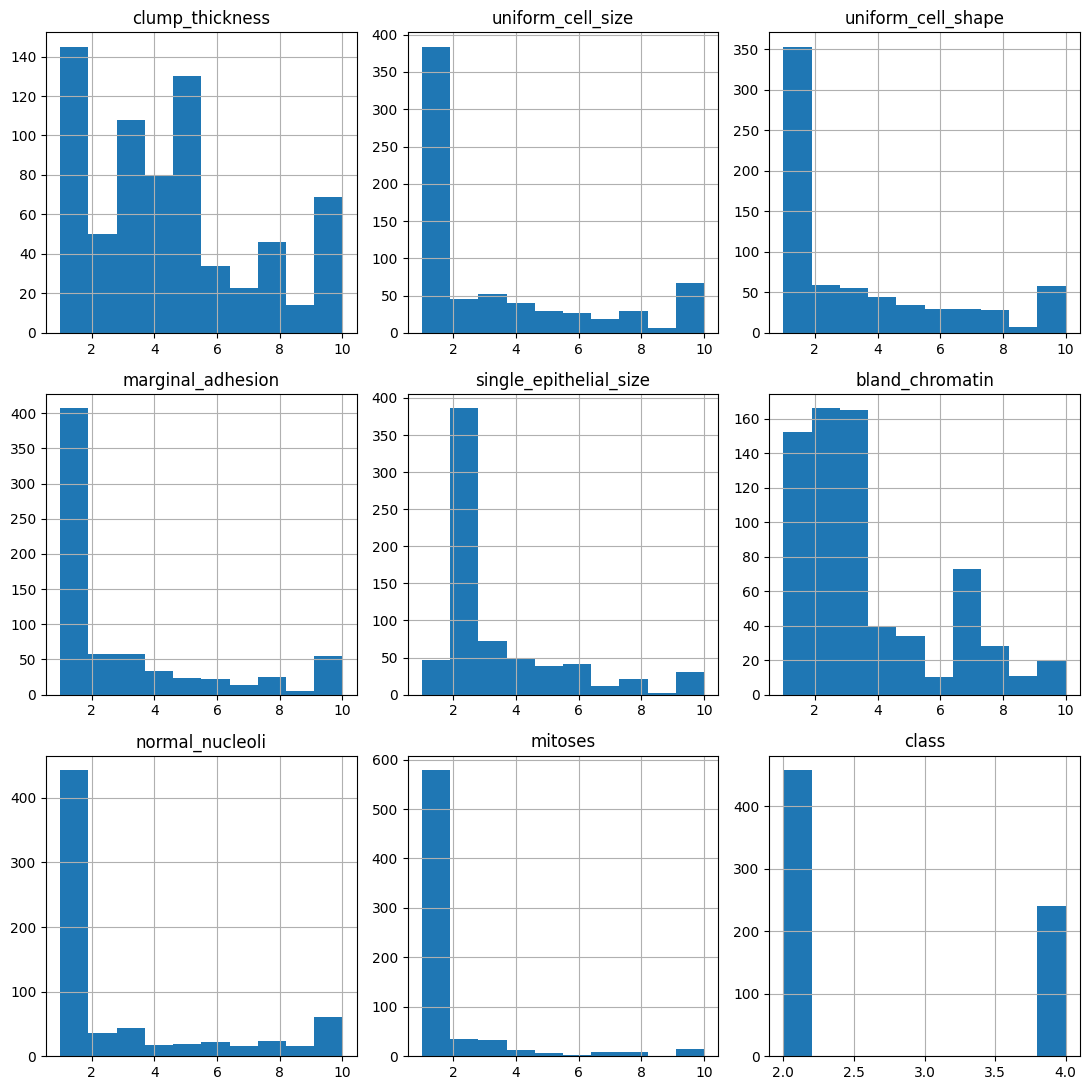

In [7]:
#Shape of the Dataset
# df.shape
# Target variable
# sns.countplot(df['class'],palette='Paired')
import matplotlib.pyplot as plt

df.hist(figsize=(11, 11))
plt.tight_layout()
plt.show()

## Data pre-processing

In [ ]:
df.drop(['id'],axis=1,inplace = True)

In [ ]:
# Columns in the dataset
df.columns


## Handling missing values

In [ ]:
df.info()

In [ ]:
#Diagnosis class Malignant = 4 and Benign = 2
#The number of Benign and Maglinant cases from the dataset
df['class'].value_counts()

In [ ]:
df['bare_nuclei'].value_counts()

In [ ]:
df[df['bare_nuclei'] == '?']

In [ ]:
df[df['bare_nuclei'] == '?'].sum()

In [ ]:
df.replace('?',np.nan,inplace=True)

In [ ]:
df['bare_nuclei'][23]

In [ ]:
df.isna().sum()

In [ ]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

## Exploratory Data Analysis

In [ ]:
df.info()

In [ ]:
df.describe()

## Bivariate Data Analysis

In [ ]:
sns.displot(df['class'],kde=True)

In [ ]:
ax = df[df['class'] == 4][0:50].plot(kind='scatter', x='clump_thickness', y='uniform_cell_size', color='DarkBlue', label='malignant');
df[df['class'] == 2][0:50].plot(kind='scatter', x='clump_thickness', y='uniform_cell_size', color='Yellow', label='benign', ax=ax);
plt.show()

## Multivariate Data Analysis

In [ ]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()
df.shape

In [ ]:
# Create scatter plot matrix
scatter_matrix(df, figsize = (18,18))
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

## Feature selection

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [ ]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

## Train and Test Model

Accuracy for DecisionTreeClassifier: 0.9238095238095239
Accuracy for SVC: 0.9619047619047619
Accuracy for KNeighborsClassifier: 0.9571428571428572
Accuracy for RandomForestClassifier: 0.9619047619047619


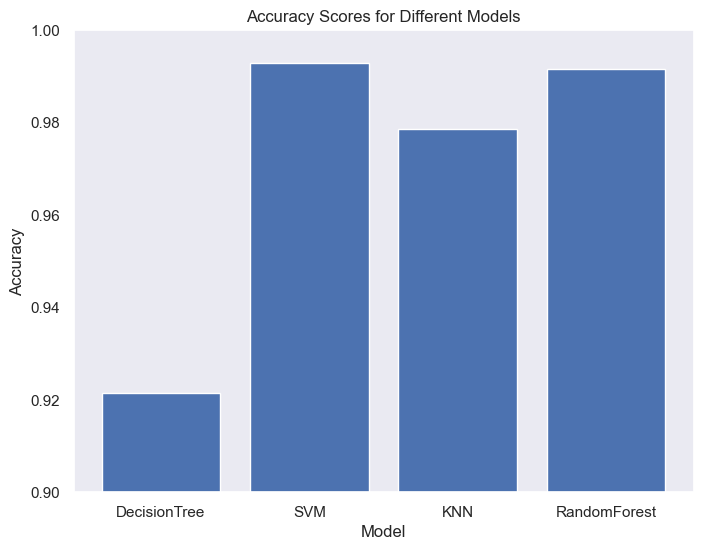

In [91]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 

Y = df['class'].values
X = df.drop('class', axis=1).values
# X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the models
models = [DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), RandomForestClassifier()]

# Iterate over the models
for model in models:
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(Y_test, predictions)
    
    # Print the accuracy score
    print(f"Accuracy for {type(model).__name__}: {accuracy}")
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [0.9214285714285714, 0.9928571428571429, 0.9785714285714285, 0.991657142857142]

# Model names
model_names = ['DecisionTree', 'SVM', 'KNN', 'RandomForest']

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0.9, 1.0)  # Adjust the limits of the y-axis
plt.show()


## Model Selection
### Baseline algorithm checking

* Analyse and build a model to predict if a given set of symptoms lead to breast cancer. This is a binary classification problem, and a few algorithms are appropriate for use. 

* As we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform. 

* We will use 10 fold cross validation for each testing.

* The following non-linear algorithms will be used, namely: 
  * Classification and Regression Trees (CART) 
  * Linear Support Vector Machines (SVM)
  * Gaussian Naive Bayes (NB) 
  * k-Nearest Neighbors (KNN).

In [ ]:
# Testing Options
scoring = 'accuracy'

In [ ]:
# Define models to train
from sklearn.ensemble import RandomForestClassifier


models= []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
# models.append(('NB', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))  
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    #   #   #   #   #   #   #   #   #   #   #   #   #   #   #   #   #   #   #   #   # 



In [ ]:
# fig = plt.figure(figsize=(10,10))
# fig.suptitle('Performance Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()
import matplotlib.pyplot as plt

# Mean accuracy values
mean_accuracy = [0.950935, 0.971386, 0.969345, 0.969345]

# Model names
model_names = ['DecisionTreeClassifier', 'SVM', 'RandomForest', 'KNN']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, mean_accuracy)
plt.title('Mean Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.ylim(0.94, 0.98)  # Adjust the y-axis limits if needed
plt.show()


CART, SVM, GaussianNB and KNN  performed the best with  above 95% mean accuracy

In [ ]:
# Make predictions on validation dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

## Support Vector Machine

In [92]:
clf = SVC()

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.9619047619047619


array([4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

In [93]:
example_measures = [[4,2,1,1,1,2,3,2,1]]
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [94]:
import itertools
sns.set_theme(style="dark")
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       131
           4       0.94      0.96      0.95        79

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210

Confusion matrix, without normalization
[[126   5]
 [  3  76]]


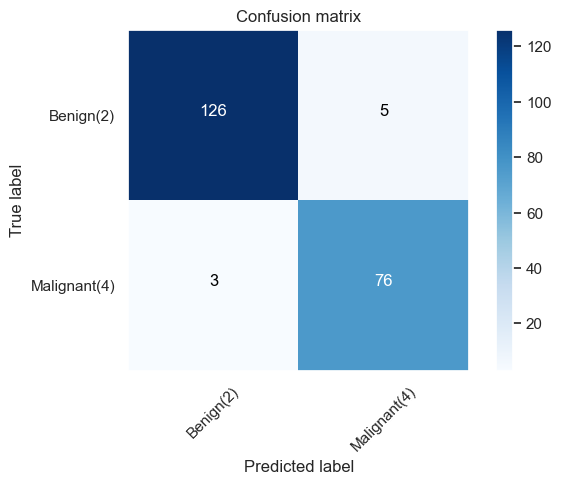

In [95]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predict, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(Y_test, predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [96]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[4,2,1,1,1,2,3,2,1]]))

[2]
